In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mtl
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("C:/Users/Vaishali/Downloads/archive/world-happiness-report-2015-2022.csv")
df.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
df.shape


(1229, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB


In [7]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  Happiness Rank      Country  \
0              0               1  Switzerland   
1              1               2      Iceland   
2              2               3      Denmark   
3              3               4       Norway   
4              4               5       Canada   
...          ...             ...          ...   
1224         141             142    Botswana*   
1225         142             143      Rwanda*   
1226         143             144     Zimbabwe   
1227         144             145      Lebanon   
1228         145             146  Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               .

In [10]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

(0, 12)


From 1229 rows , there is no duplicate data in the world happiness report

In [13]:
df.Region.unique()


array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', '-',
       'North America and ANZ', 'Middle East and North Africa',
       'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'South Asia'], dtype=object)

In [15]:
df.describe()

,Unnamed: 0,Happiness Rank,Year
count,1229.000000,1229.000000,1229.000000
mean,76.471928,77.468674,2018.447518
std,44.474367,44.474181,2.283610
min,0.000000,1.000000,2015.000000
25%,38.000000,39.000000,2016.000000
50%,76.000000,77.000000,2018.000000
75%,115.000000,116.000000,2020.000000
max,157.000000,158.000000,2022.000000


In [52]:
# Region with low and high happiness score 
df_region = df.groupby(['Region','Country'])['Happiness Score'].min().sort_values(ascending= True)
print(df_region) 

Region                           Country                 
Southern Asia                    Afghanistan                       2,404
Middle East and Northern Africa  Lebanon                           2,955
Sub-Saharan Africa               Zimbabwe                          2,995
South Asia                       Afghanistan                       2.523
Sub-Saharan Africa               Central African Republic    2.693000078
                                                                ...     
Latin America and Caribbean      Puerto Rico                       7.039
North America and ANZ            Canada                            7.103
Middle East and North Africa     Israel                      7.128600121
North America and ANZ            Australia                         7.183
                                 New Zealand                       7.277
Name: Happiness Score, Length: 255, dtype: object


In [54]:
#
df_freedom= df.groupby(['Country'])['Freedom'].max().sort_values(ascending= False)
print(df_freedom)

Country
Uzbekistan               0.724
Norway                   0.703
Cambodia                 0.702
Iceland                  0.698
Finland                  0.691
                         ...  
Mauritania*              0,304
Eswatini, Kingdom of*    0,259
Madagascar*              0,202
Comoros*                 0,185
Chad*                    0,180
Name: Freedom, Length: 195, dtype: object


In [58]:
df_region = df.groupby(['Country' , 'Year'])['Happiness Rank'].min().sort_values(ascending= True)
print(df_region)

Country      Year
Denmark      2016      1
Norway       2017      1
Switzerland  2015      1
Finland      2022      1
             2021      1
                    ... 
Burundi      2018    156
Syria        2016    156
Burundi      2015    157
             2016    157
Togo         2015    158
Name: Happiness Rank, Length: 1229, dtype: int64


In [62]:
df_health = df.groupby(['Country' , 'Region'])['Health (Life Expectancy)'].max().sort_values(ascending = False)
print(df_health)

Country                    Region           
Singapore                  Southeastern Asia          1.141
                           Southeast Asia       1.137814283
Hong Kong S.A.R. of China  East Asia            1.136630654
Hong Kong                  Eastern Asia               1.122
Japan                      Eastern Asia               1.088
                                                   ...     
Liberia*                   -                          0,309
Botswana*                  -                          0,280
Chad*                      -                          0,225
Eswatini, Kingdom of*      -                          0,197
Lesotho*                   -                          0,000
Name: Health (Life Expectancy), Length: 255, dtype: object


In [67]:
#No. of countries evaluated 
countries = len(df.Country.unique())
print(countries)

195


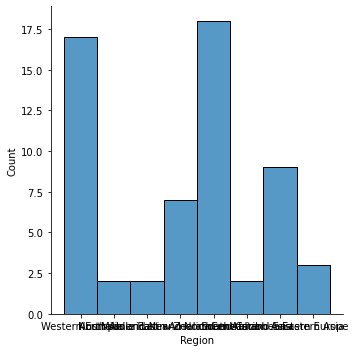

In [89]:
# data = df['Country'].head()
sn.displot(df['Region'].head(60) , bins=100)
# sn.show()

In [85]:
# df_new =df.take([20] , axis =0)
# print(df)
# df.take([0,2,3,4,5] , axis =1)
df_new = df.head(20)
df_new


,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,5,6,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,6,7,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2015
7,7,8,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2015
8,8,9,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,9,10,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015
